In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.BCEWithLogitsLoss()

### For k = 1

In [7]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_Ada1, trainAccList_Ada1, valLossList_Ada1, valAccList_Ada1  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 16265.0721 - average: 0.2711; Performance: 0.8816
TESTING - loss 1797.9061901569366 - performance 0.9339
Epoch 2 completed. Loss - total: 8701.9426 - average: 0.1450; Performance: 0.9477
TESTING - loss 1223.949633538723 - performance 0.9553
Epoch 3 completed. Loss - total: 6512.2126 - average: 0.1085; Performance: 0.9620
TESTING - loss 980.6761331856251 - performance 0.9659
Epoch 4 completed. Loss - total: 5417.7913 - average: 0.0903; Performance: 0.9687
TESTING - loss 841.4692655205727 - performance 0.9704
Epoch 5 completed. Loss - total: 4718.3419 - average: 0.0786; Performance: 0.9730
TESTING - loss 750.9528696537018 - performance 0.9734
Epoch 6 completed. Loss - total: 4220.4370 - average: 0.0703; Performance: 0.9756
TESTING - loss 687.3726360499859 - performance 0.9767
Epoch 7 completed. Loss - total: 3840.3546 - average: 0.0640; Performance: 0.9779
TESTING - loss 640.4875721782446 - performance 0.9788
Epoch 8 completed. Loss - t

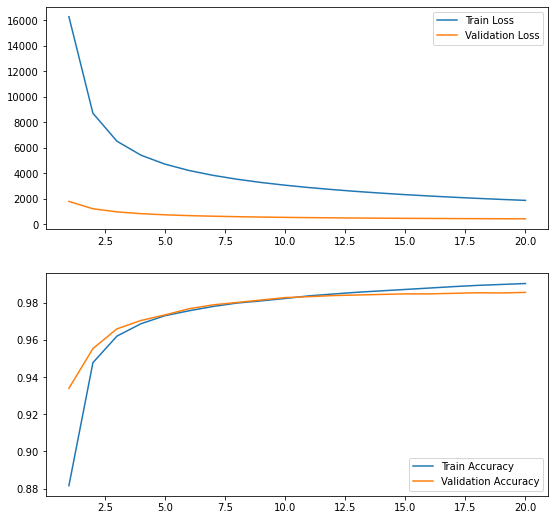

In [8]:
plot_loss_accuracy(trainLostList_Ada1,valLossList_Ada1,trainAccList_Ada1,valAccList_Ada1,num_epochs)

In [9]:
k=1
model2 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate)

trainLostList_sgd1, trainAccList_sgd1, valLossList_sgd1, valAccList_sgd1  = train_model(model2, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy_manual, device="cuda:0",lr = learn_rate, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 11896.6074 - average: 0.1983; Performance: 0.9198
TESTING - loss 1190.5931122601032 - performance 0.9563
Epoch 2 completed. Loss - total: 5771.9458 - average: 0.0962; Performance: 0.9662
TESTING - loss 832.4812948703766 - performance 0.9701
Epoch 3 completed. Loss - total: 4388.6607 - average: 0.0731; Performance: 0.9744
TESTING - loss 687.9506539553404 - performance 0.9760
Epoch 4 completed. Loss - total: 3649.3851 - average: 0.0608; Performance: 0.9784
TESTING - loss 606.3424088060856 - performance 0.9787
Epoch 5 completed. Loss - total: 3152.7341 - average: 0.0525; Performance: 0.9816
TESTING - loss 551.4281690120697 - performance 0.9808
Epoch 6 completed. Loss - total: 2778.0843 - average: 0.0463; Performance: 0.9840
TESTING - loss 512.3076438903809 - performance 0.9825
Epoch 7 completed. Loss - total: 2476.1143 - average: 0.0413; Performance: 0.9862
TESTING - loss 481.48294165730476 - performance 0.9841
Epoch 8 completed. Loss - 

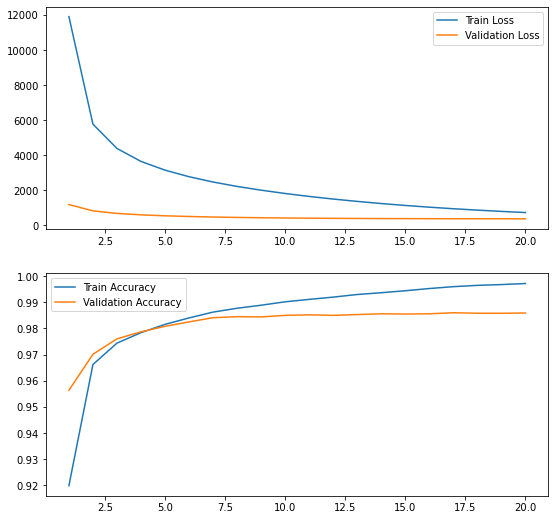

In [10]:
plot_loss_accuracy(trainLostList_sgd1,valLossList_sgd1,trainAccList_sgd1,valAccList_sgd1,num_epochs)

In [11]:
device="cuda:0"
loss_type = "Binary Cross Entropy"
modelManual = MLPManual(k, device, batch_size, loss_type)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch  = train_model_manually(modelManual, k, trainset, testset,                                                                                                                                        loss_type, loss_fn, num_epochs, batch_size, validate_model = True,
                                                                          device=device)

Epoch 1 completed. Loss - total: 31959.2441 - average: 0.5327; Performance: 0.9539
TESTING - loss 5205.252794265747 - performance 0.9744
Epoch 2 completed. Loss - total: 30916.4961 - average: 0.5153; Performance: 0.9806
TESTING - loss 5172.430255889893 - performance 0.9770
Epoch 3 completed. Loss - total: 30697.3809 - average: 0.5116; Performance: 0.9859
TESTING - loss 5152.687894821167 - performance 0.9799
Epoch 4 completed. Loss - total: 30565.8301 - average: 0.5094; Performance: 0.9892
TESTING - loss 5133.770548820496 - performance 0.9814
Epoch 5 completed. Loss - total: 30472.5430 - average: 0.5079; Performance: 0.9915
TESTING - loss 5120.095586776733 - performance 0.9832
Epoch 6 completed. Loss - total: 30398.7949 - average: 0.5066; Performance: 0.9933
TESTING - loss 5109.507785797119 - performance 0.9842
Epoch 7 completed. Loss - total: 30339.8574 - average: 0.5057; Performance: 0.9949
TESTING - loss 5103.306834220886 - performance 0.9849
Epoch 8 completed. Loss - total: 30291.51

### For k = 3

In [12]:
k = 3

model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_Ada3, trainAccList3_Ada3, \
valLossList3_Ada3, valAccList3_Ada3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size,                                                                                                  validate_model = True, performance=accuracy_manual, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41798.3671 - average: 0.6966; Performance: 0.5002
TESTING - loss 6939.25815820694 - performance 0.4916
Epoch 2 completed. Loss - total: 41522.5722 - average: 0.6920; Performance: 0.4970
TESTING - loss 6896.841049194336 - performance 0.4980
Epoch 3 completed. Loss - total: 41000.3664 - average: 0.6833; Performance: 0.5014
TESTING - loss 6741.158187389374 - performance 0.5261
Epoch 4 completed. Loss - total: 39785.2906 - average: 0.6631; Performance: 0.5272
TESTING - loss 6470.260739326477 - performance 0.5468
Epoch 5 completed. Loss - total: 38107.1802 - average: 0.6351; Performance: 0.5722
TESTING - loss 6160.7308983802795 - performance 0.6144
Epoch 6 completed. Loss - total: 36652.5619 - average: 0.6109; Performance: 0.6147
TESTING - loss 5991.318762302399 - performance 0.6317
Epoch 7 completed. Loss - total: 35410.8634 - average: 0.5902; Performance: 0.6418
TESTING - loss 5796.700537204742 - performance 0.6594
Epoch 8 completed. Los

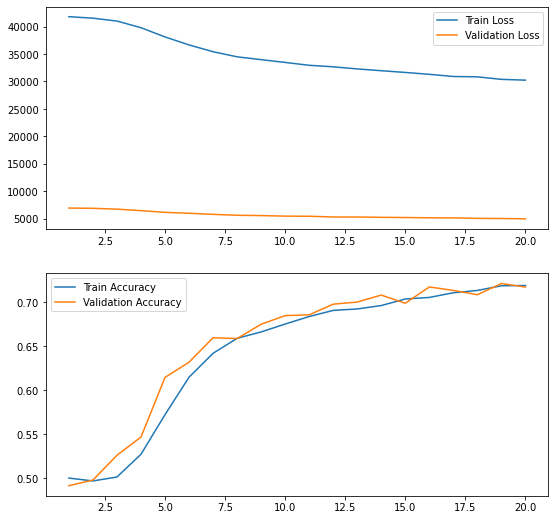

In [13]:
plot_loss_accuracy(trainLostList_Ada3,valLossList3_Ada3,trainAccList3_Ada3,valAccList3_Ada3,num_epochs)

In [14]:
k = 3
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_sgd3, trainAccList_sgd3, valLossList_sgd3, valAccList_sgd3  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size,                                                                                                 validate_model = True, performance=accuracy_manual, device="cuda", lr_scheduler=None)

Training on cuda
Epoch 1 completed. Loss - total: 41775.7423 - average: 0.6963; Performance: 0.5024
TESTING - loss 6941.8845772743225 - performance 0.5016
Epoch 2 completed. Loss - total: 41445.6471 - average: 0.6908; Performance: 0.5003
TESTING - loss 6829.606413841248 - performance 0.5036
Epoch 3 completed. Loss - total: 40088.9334 - average: 0.6681; Performance: 0.5301
TESTING - loss 6418.64538192749 - performance 0.5501
Epoch 4 completed. Loss - total: 37419.8723 - average: 0.6237; Performance: 0.5958
TESTING - loss 5969.7940945625305 - performance 0.6241
Epoch 5 completed. Loss - total: 35364.5117 - average: 0.5894; Performance: 0.6435
TESTING - loss 5814.560294151306 - performance 0.6777
Epoch 6 completed. Loss - total: 34351.8636 - average: 0.5725; Performance: 0.6612
TESTING - loss 5606.613636016846 - performance 0.6662
Epoch 7 completed. Loss - total: 33754.7372 - average: 0.5626; Performance: 0.6697
TESTING - loss 5544.036448001862 - performance 0.6897
Epoch 8 completed. Loss

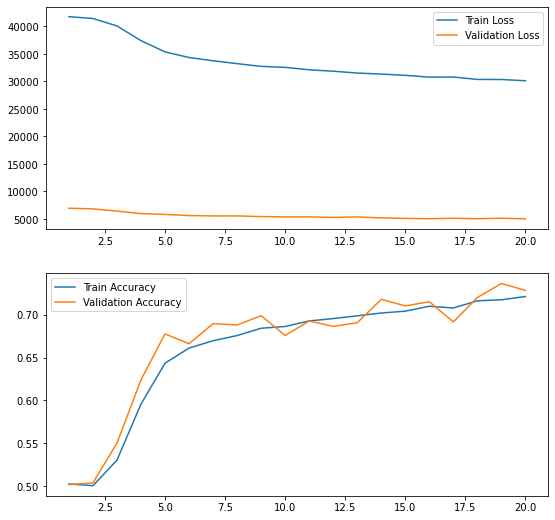

In [15]:
plot_loss_accuracy(trainLostList_sgd3, valLossList_sgd3, trainAccList_sgd3, valAccList_sgd3, num_epochs)

In [16]:
k=3
loss_type = "Binary Cross Entropy"
modelManual3 = MLPManual(k, device, batch_size, loss_type)

trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, validate_model = True, device=device)

Epoch 1 completed. Loss - total: 43401.2812 - average: 0.7234; Performance: 0.5127
TESTING - loss 7248.2990255355835 - performance 0.5197
Epoch 2 completed. Loss - total: 42762.1211 - average: 0.7127; Performance: 0.5745
TESTING - loss 6952.158739089966 - performance 0.6293
Epoch 3 completed. Loss - total: 41268.8945 - average: 0.6878; Performance: 0.6515
TESTING - loss 6781.012769699097 - performance 0.6608
Epoch 4 completed. Loss - total: 40729.1992 - average: 0.6788; Performance: 0.6749
TESTING - loss 6713.292812347412 - performance 0.6871
Epoch 5 completed. Loss - total: 40385.9062 - average: 0.6731; Performance: 0.6852
TESTING - loss 6713.897577285767 - performance 0.6985
Epoch 6 completed. Loss - total: 40212.5039 - average: 0.6702; Performance: 0.6942
TESTING - loss 6694.652044296265 - performance 0.6977
Epoch 7 completed. Loss - total: 40150.7500 - average: 0.6692; Performance: 0.6982
TESTING - loss 6716.555713653564 - performance 0.7004
Epoch 8 completed. Loss - total: 39947.8

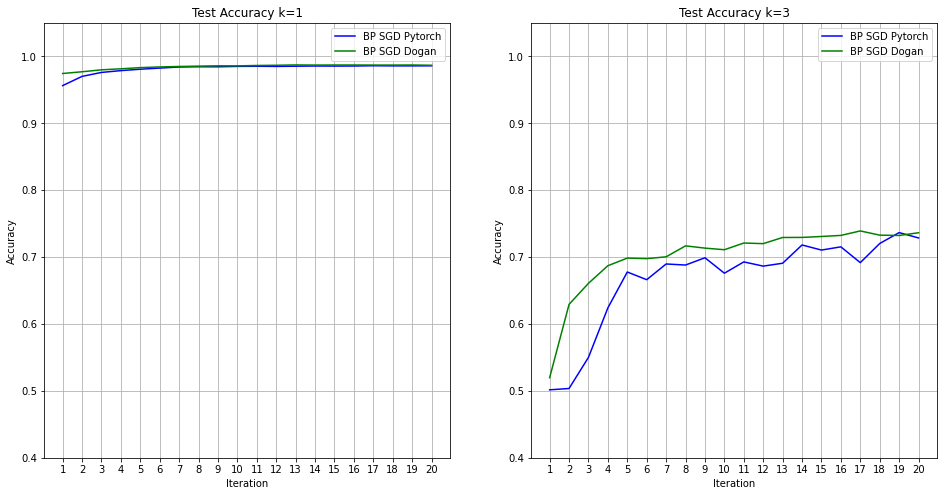

In [17]:

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(range(1,21),valAccList_sgd1, color = "blue", label = "BP SGD Pytorch")
ax1.plot(range(1,21),valAccList_sgd1_scratch, color = "green", label = "BP SGD Dogan")
ax1.set_ylim(0.4,1.05)
ax1.set_title("Test Accuracy k=1")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(range(1,21))
ax1.legend()
ax1.grid(True)


ax3.plot(range(1,21),valAccList_sgd3, color = "blue", label = "BP SGD Pytorch")
ax3.plot(range(1,21),valAccList_sgd3_scratch, color = "green", label = "BP SGD Dogan")

ax3.set_ylim(0.4,1.05)
ax3.set_title("Test Accuracy k=3")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.set_xticks(range(1,21))
ax3.legend()
ax3.grid(True)

plt.show();

Activation: ReLU
Training on cuda:0
Epoch 1 completed. Loss - total: 41817.5846 - average: 0.6970; Performance: 0.4998
TESTING - loss 6936.326086521149 - performance 0.4954
Epoch 2 completed. Loss - total: 41582.5000 - average: 0.6930; Performance: 0.5005
TESTING - loss 6900.335729122162 - performance 0.5028
Epoch 3 completed. Loss - total: 41113.9017 - average: 0.6852; Performance: 0.5022
TESTING - loss 6760.908782482147 - performance 0.5156
Epoch 4 completed. Loss - total: 39953.3006 - average: 0.6659; Performance: 0.5199
TESTING - loss 6486.337721347809 - performance 0.5450
Epoch 5 completed. Loss - total: 38166.1132 - average: 0.6361; Performance: 0.5665
TESTING - loss 6201.60710811615 - performance 0.6158
Epoch 6 completed. Loss - total: 36499.6595 - average: 0.6083; Performance: 0.6135
TESTING - loss 5945.701956748962 - performance 0.6379
Epoch 7 completed. Loss - total: 35408.6927 - average: 0.5901; Performance: 0.6390
TESTING - loss 5771.992087364197 - performance 0.6623
Epoch 

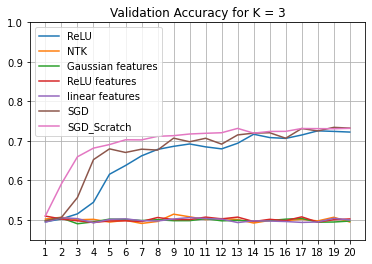

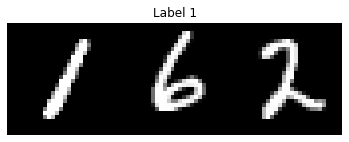

In [18]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20
loss_type = "Binary Cross Entropy"

#fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD", "SGD_Scratch"]:
    if activation != "SGD_Scratch":
        model = MLP(K, activation)
        if "features" in activation:
            # deactivate the first layer
            optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
        elif "NTK" in activation:
            paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
            optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
        elif "SGD" in activation:
            optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
        else:
            optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

        print("Activation:",activation)

        trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs,
                                                                            batch_size, validate_model = True, performance=accuracy_manual,
                                                                            device="cuda:0", lr_scheduler=None)
    else:
        print("Activation:",activation)
        modelManual3 = MLPManual(K, device, batch_size, loss_type)

        trainLostList, trainAccList, valLossList, valAccList  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                  batch_size, validate_model = True, device=device)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper